In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('./walmart_data.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


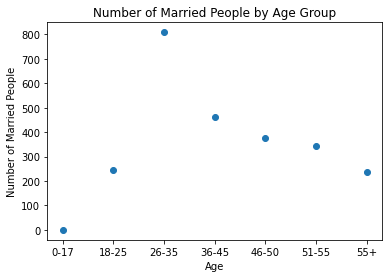

In [18]:
age_marraige_data = df[["age", "marital_status", "user_id"]].drop_duplicates()
marriage_count = age_marraige_data.groupby("age").sum().reset_index()
plt.scatter(marriage_count["age"], marriage_count["marital_status"])
plt.xlabel("Age")
plt.ylabel("Number of Married People")
plt.title("Number of Married People by Age Group")
plt.show()

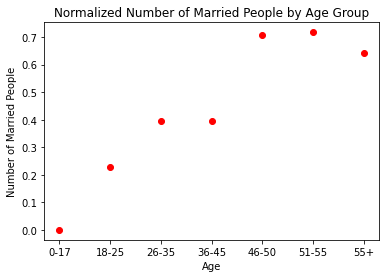

In [21]:
age_counts = df.groupby("age")["user_id"].nunique()
marriage_count["total_people"] = marriage_count["age"].map(age_counts)
marriage_count["normalized_marriages"] = marriage_count["marital_status"] / marriage_count["total_people"]
plt.scatter(marriage_count["age"], marriage_count["normalized_marriages"], color="red")
plt.xlabel("Age")
plt.ylabel("Number of Married People")
plt.title("Normalized Number of Married People by Age Group")
plt.show()

In [23]:
num_transactions = df.groupby(['gender'])['purchase'].count()

num_users = df.groupby(['gender'])['user_id'].nunique()

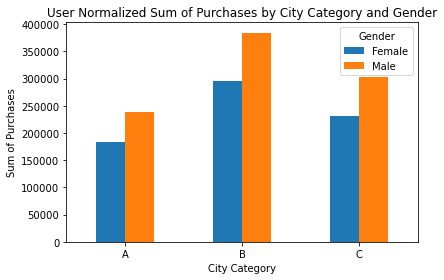

In [27]:
purchase_amounts = df.groupby(['gender', 'city_category'])['purchase'].sum().unstack().fillna(0)

purchase_amounts_normalized = purchase_amounts.div(num_users, axis=0)

purchase_amounts_normalized.T.plot(kind='bar')

plt.title("User Normalized Sum of Purchases by City Category and Gender")
plt.xlabel("City Category")
plt.ylabel("Sum of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()

plt.show()

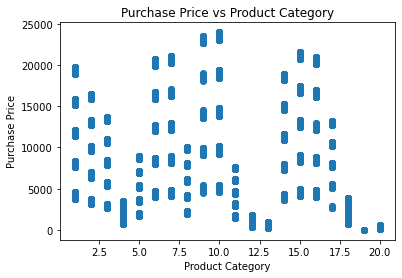

In [26]:
purchase_and_product_cat_data = df[["purchase", "product_category"]]
plt.scatter(purchase_and_product_cat_data["product_category"], purchase_and_product_cat_data["purchase"])
plt.xlabel("Product Category")
plt.ylabel("Purchase Price")
plt.title("Purchase Price vs Product Category")
plt.show()

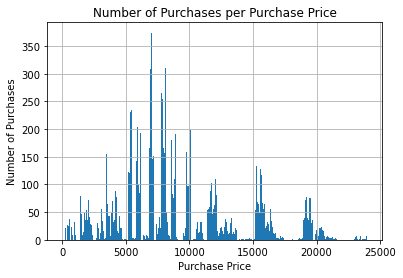

In [29]:
df['purchase'].hist(bins=18105)
plt.xlabel("Purchase Price")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases per Purchase Price")
plt.show()